#LAB 07

# Prerequisite
* Load required packages and load images (already uploaded on BlackBoard) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Submit the solution to BlackBoard by Feb 25, 2024 in **.ipynb** format.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY basic numpy and Tensorflow functions**

##Give to YOU!!

In [38]:
import tensorflow as tf
import numpy as np
from scipy import ndimage as nd
from scipy import interpolate as inter
from matplotlib import pyplot as plt
import imageio.v2 as imageio

In [39]:
T = 15
coeffc = np.random.randn(T)
coeffs = np.random.randn(T)

In [40]:
print(f'coefficients of cosine are:{coeffc}')
print(f'coefficients of sine are:{coeffs}')

coefficients of cosine are:[-1.4492657   0.92432099 -1.65129187 -1.71697505 -0.56792374 -1.4543026
  0.17972505 -0.57082719 -0.20600956 -0.62817259  0.79991988  2.35189202
  0.29203764 -0.27692118  0.08447663]
coefficients of sine are:[ 0.78797504  2.26039486  0.04975495 -0.16034759  0.22721229 -0.50908514
 -0.22035737  0.43496133  0.24400136  1.25305738  0.46282487 -0.16368387
 -0.84993989 -0.7536759   0.68321863]


In [41]:
f = lambda x: np.sum([coeffc[i]*np.cos((i*x*2*np.pi)/T)+coeffs[i]*np.sin((i*x*2*np.pi)/T) for i in range(T)])
f_vec = np.vectorize(f)

In [42]:
L = (2*np.pi)/T
print(f"L = {L}")

L = 0.41887902047863906


In [43]:
dx = .0001
x = np.arange(0,T,dx)
y = f_vec(x)

###This is your signal

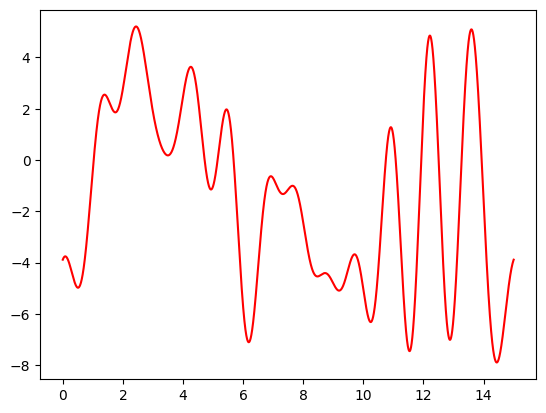

In [44]:
plt.plot(x,y,'r-')

In [45]:
fourier_coeff = np.fft.fft(y)

In [46]:
fourier_coeff

array([-217389.85532954     +0.j        ,
         69324.07402562-169529.61472952j,
       -123846.89016337  -3731.62134571j, ...,
       -128773.12906668 -12026.06903035j,
       -123846.89016337  +3731.62134571j,
         69324.07402562+169529.61472952j])

## This is fourier reconstruction

In [47]:
y1 = np.fft.ifft(fourier_coeff).real

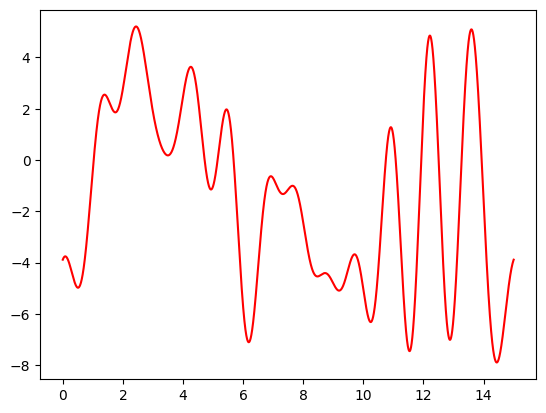

In [48]:
plt.plot(x,y1,'r-')

#Q1) Write a code to sample at $2\pi/T$ interval in continous signal  [2 Marks]

L = 0.41887902047863906


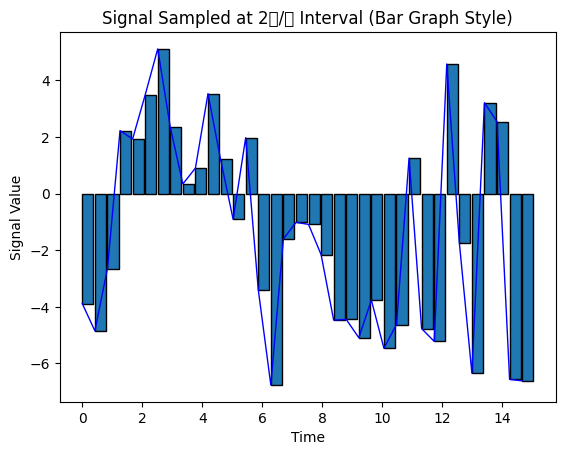

In [49]:
def custom_function(x, T, coeffc, coeffs):
    result = 0
    for i in range(T):
        result += coeffc[i] * np.cos((i * x * 2 * np.pi) / T) + coeffs[i] * np.sin((i * x * 2 * np.pi) / T)
    return result

f_vec = np.vectorize(custom_function)

T = 10  
coeffc = np.random.rand(T)  
coeffs = np.random.rand(T)  

L = (2 * np.pi) / T
print(f"L = {L}")

sampling_interval = 2 * np.pi / T

x_sampled = np.arange(0, T, sampling_interval)

y_sampled = f_vec(x_sampled, T, coeffc, coeffs)

plt.bar(x_sampled, y_sampled, width=sampling_interval - 0.05, align='edge', edgecolor='black')  # Adjust width as needed
plt.plot(x_sampled, y_sampled, 'b-', linewidth=1)
plt.title("Signal Sampled at 2𝜋/𝑇 Interval (Bar Graph Style)")
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.show()

#Q2) write a code to create a sinc function with frequency $T/2π$   [2 Marks]

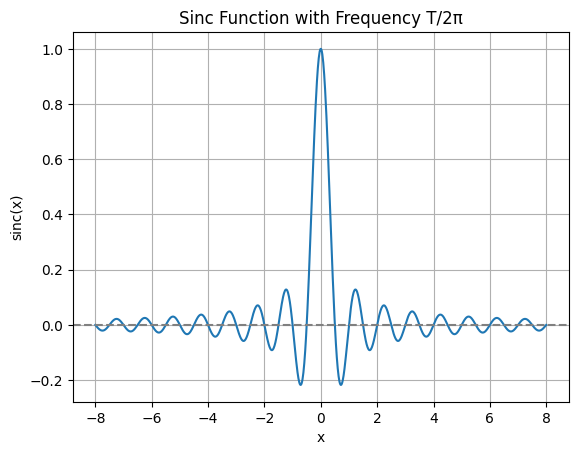

In [32]:
def custom_sinc(x, T):
    return np.sin(np.pi * x * T) / (np.pi * x * T)

frequency_parameter = 2

x_values = np.linspace(-4 * frequency_parameter, 4 * frequency_parameter, 1000)

y_values = custom_sinc(x_values, frequency_parameter)

plt.plot(x_values, y_values)
plt.xlabel("x")
plt.ylabel("sinc(x)")
plt.title("Custom Sinc Function with Frequency T/2π")
plt.axhline(y=0, color='gray', linestyle='--')
plt.grid(True)
plt.show()

#Q3) Write a code to recreate original signal back [6 Marks]
Plot original signal and reconstructed signal on same plot with different color

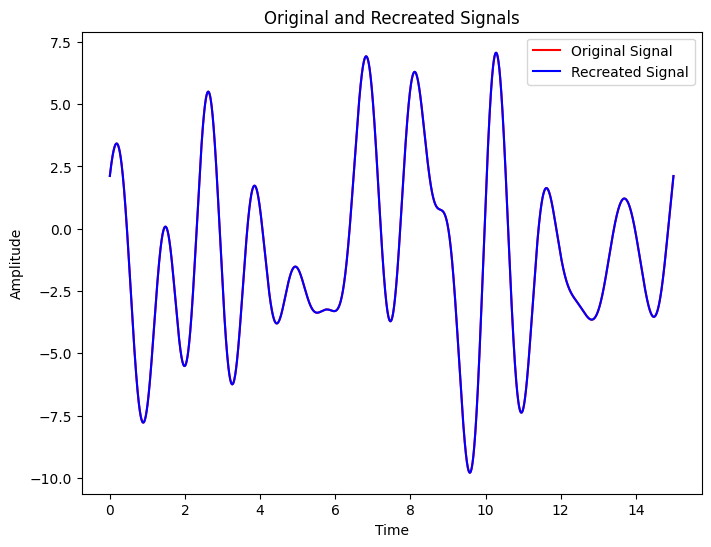

In [71]:
f= lambda x: np.sum([coeffc[i]*np.cos((i*x*2*np.pi)/T)+coeffs[i]*np.sin((i*x*2*np.pi)/T) for i in range(T)])
f_vec = np.vectorize(f)

T = 10 

L = (2*np.pi)/T
dx = 0.0001
x = np.arange(0, T, dx)
y = f_vec(x)

fourier_coeff = np.fft.fft(y)

recreated_signal = np.fft.ifft(fourier_coeff).real

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'r-', label='Original Signal')
plt.plot(x, recreated_signal, 'b-', label='Recreated Signal')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original and Recreated Signals')
plt.show()